In [1]:
from ising import *
import matplotlib.pyplot as plt
import numpy as np
from acf import acf

In [2]:
J = 1
h = 0
size = 1_000
n_sweeps = 100_000
n_betas = 5
params = {'beta': np.linspace(0.5, 3, n_betas), 'estimate': np.empty((n_betas)), 'exact' : np.empty(n_betas), 'tau' : np.empty(n_betas), 'energies': np.empty((n_betas, n_sweeps)), 'magnetizations': np.empty((n_betas, n_sweeps))}

In [3]:
init_configuration = get_configuration(size)
for i, beta in enumerate(params['beta']):
    params['energies'][i], params['magnetizations'][i]= monte_carlo_noconfig(n_sweeps=n_sweeps, beta=beta, J=J, h=h, configuration=init_configuration)
    params['estimate'][i] = params['energies'][i][-1]
    params['exact'][i] = exact_energy(beta, J, N= size)

In [4]:
SE = (params['estimate'] -  params['exact']).std()/np.sqrt(n_betas)

In [5]:
np.abs(SE*100/params['estimate'].mean())

1.2386609010904306

In [6]:
for i, beta in enumerate(params['beta']):
    corr = acf(params['magnetizations'][i], 10_000)
    tau = 1/2
    for j in range(corr.shape[-1]):
        tau += corr[j]
        if j >= 6 * tau:
            break
        else:
            continue
    params['tau'][i] = tau
    print(f'beta = {beta:.2f}, tau = {tau:.2f}')
    

beta = 0.50, tau = 3.78
beta = 1.12, tau = 29.60
beta = 1.75, tau = 236.78
beta = 2.38, tau = 1772.34
beta = 3.00, tau = 3999.06


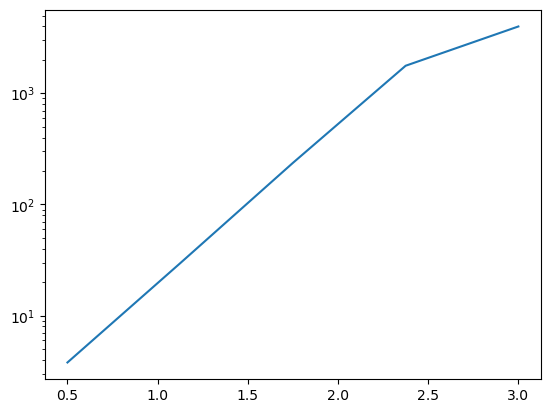

In [7]:
plt.plot(params['beta'], params['tau'])
plt.yscale('log')

In [8]:
params['tau']

array([3.78357468e+00, 2.96015868e+01, 2.36779896e+02, 1.77233620e+03,
       3.99906494e+03])